# Description

RegImpute is a Python based imputation tool.  Input is a 2D numpy array with missing values represented as np.nan cells.  Features are columns in the array.  RegImpute first fills missing cells using simple imputation (e.g., row mean/median) and then uses regression to update the imputed cells.  Imputation is iterative until a specified delta is reached between the previous and current values (MSE).

# Installation

sudo pip install RegImpute

# Use Case:

In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from RegImpute.StaticImpute import StaticImpute



df = pd.read_csv("test_data/test_missing.csv")
data_cols = df.columns[1:] #define columns to be imputed
data = df[data_cols].values.astype(np.float64) #extract data from those columns

model = Ridge(alpha=0.7, fit_intercept=True, normalize=True) #Choosing to use ridge regression since it's fast and robust.
imp_inst = StaticImpute(data,'static','regressionImpute',model=model,fillmethod="row_median",max_iter=50,mse=1e-9) #specify imputation model
imputed = imp_inst.impute() #run imputation and return results results
df[data_cols] = imputed # overwrite nans with imputed data

df.to_csv("imputed_results.txt",index=False)

Imputing...
MSE on iteration 1: 0.002321982156555319
MSE on iteration 2: 0.0001849207473333906
MSE on iteration 3: 2.011811883574012e-05
MSE on iteration 4: 2.6073165590149154e-06
MSE on iteration 5: 3.725078974530758e-07
MSE on iteration 6: 5.6939047486180967e-08
MSE on iteration 7: 9.150142521879194e-09
MSE on iteration 8: 1.5301702548087903e-09
MSE on iteration 9: 2.644734525126458e-10
Imputation Complete!


The input file includes 2123 rows of data and 20 columns.  The columns and rows are covariate, so the regression model can leverage them to make predictions about the missing values.  After importing RegImpute, the first few rows of code simply extract the data to be imputed from a data frame.

In the example I'm using ridge regression to impute, but one could theoretically use any regression model from sklearn (has not been verified).

# Step 1: Specify a regression model from sklearn

In [7]:

#model = Ridge(alpha=0.7, fit_intercept=True, normalize=True)



# Step2: Initialize an imputation object

In [8]:

#imp_inst = StaticImpute(data,'static','regressionImpute',model=model,fillmethod="row_median",max_iter=50,mse=1e-9)

#'static' - Data type (either static or dynamic (time series)| for now only 'static' is accepted)
#'fillmethod' - Cursory imputation method, prior to regression updating (options: "row_median" and "column_median")
#'max_iter' - Number of updating steps allowed before mse<= specified value


# Step3: Call Imputation method

In [9]:

#imputed = imp_inst.impute()


The test data were generated by taking a complete data set and randomly removing 0-50% of the values in each row.  Since the complete data are available, we can check how well the imputation worked. 

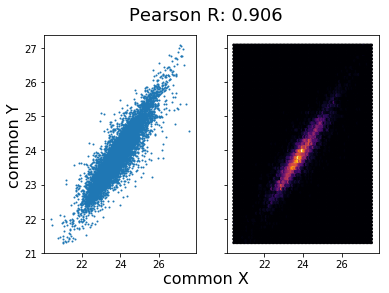

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df_complete = pd.read_csv("test_data/test_complete.csv")
complete_data = df_complete.values[:,1:]

missing_positions = np.argwhere(np.isnan(data))
imputed_values = imputed[missing_positions[:,0],missing_positions[:,1]]
known_values = complete_data[missing_positions[:,0],missing_positions[:,1]]

fig,ax=plt.subplots(1,2,sharex=True,sharey=True)
ax[0].scatter(known_values, imputed_values, s=1)
ax[1].hexbin(known_values, imputed_values, gridsize=100, cmap='inferno')

#plt.xlabel("True Values", fontsize=16)
#plt.ylabel("Imputed Values", fontsize=16)

fig.text(0.5, 0.02, 'Real Values', ha='center', fontsize=16)
fig.text(0.04, 0.5, 'Imputed Values', va='center', rotation='vertical', fontsize=16)
plt.suptitle("Pearson R: "+str(round(pearsonr(known_values,imputed_values)[0],3)),fontsize=18)
plt.show()





# Notes:

* Rows and columns missing all values will be ignored
